In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from preprocessing import *

EDA

In [36]:
# Healthcare Stocks
healthcare_stocks = [
    "ISRG",  # Intuitive Surgical Inc
    "LLY",   # Eli Lilly and Co
    "IDXX",  # IDEXX Laboratories Inc
    "BSX",   # Boston Scientific Corp
    "EW",    # Edwards Lifesciences Corp
    "DHR",   # Danaher Corp
    "SYK",   # Stryker Corp
    "CI",    # The Cigna Group
    "BMY",   # Bristol-Myers Squibb Co
    "CVS"    # CVS Health Corp
]

# Energy Stocks
energy_stocks = [
    "WMB",  # The Williams Companies Inc
    "KMI",  # Kinder Morgan Inc
    "OKE",  # ONEOK Inc
    "OXY",  # Occidental Petroleum Corp
    "CVX",  # Chevron Corp
    "XOM",  # Exxon Mobil Corp
    "PSX",  # Phillips 66
    "EOG",  # EOG Resources Inc
    "FANG", # Diamondback Energy Inc
    "SLB"   # Schlumberger NV
]

# Technology Stocks
technology_stocks = [
    "PLTR",  # Palantir Technologies Inc
    "CRWD",  # CrowdStrike Holdings Inc
    "NOW",   # ServiceNow Inc
    "FICO",  # Fair Isaac Corp
    "PANW",  # Palo Alto Networks Inc
    "ANET",  # Arista Networks Inc
    "CDNS",  # Cadence Design Systems Inc
    "QCOM",  # Qualcomm Inc
    "DELL",  # Dell Technologies Inc
    "MU"     # Micron Technology Inc
]

all_stock_symbols =  healthcare_stocks + energy_stocks + technology_stocks
start_date, end_date = '2024-01-15', '2025-01-15'
stocks_raw = yf.download(all_stock_symbols, start=start_date, end=end_date)
stocks_raw.head()

[*********************100%***********************]  30 of 30 completed


Price                      Adj Close                                    \
Ticker                          ANET        BMY        BSX        CDNS   
Date                                                                     
2024-01-16 00:00:00+00:00  63.314999  47.620232  60.250000  277.559998   
2024-01-17 00:00:00+00:00  62.247501  47.601181  60.959999  275.390015   
2024-01-18 00:00:00+00:00  64.389999  47.705944  61.049999  279.010010   
2024-01-19 00:00:00+00:00  65.877502  47.724991  60.939999  292.140015   
2024-01-22 00:00:00+00:00  66.650002  47.210693  60.740002  295.730011   

Price                                                                     \
Ticker                             CI        CRWD        CVS         CVX   
Date                                                                       
2024-01-16 00:00:00+00:00  301.977264  286.290009  74.311478  137.755371   
2024-01-17 00:00:00+00:00  303.492401  276.269989  73.898735  137.208878   
2024-01-18 00:00:00+00:00  304.082642  283.109985  70.913605  135.962570   
2024-01-19 00:00:00+00:00  297.176208  290.540009  70.918449  136.365234   
2024-01-22 00:00:00+00:00  300.098114  298.660004  71.606133  136.604904   

Price                                             ...   Volume            \
Ticker                          DELL         DHR  ...      OKE       OXY   
Date                                              ...                      
2024-01-16 00:00:00+00:00  78.308746  225.776184  ...  4326700  13323500   
2024-01-17 00:00:00+00:00  76.477089  223.615524  ...  4145500   9651200   
2024-01-18 00:00:00+00:00  77.215660  225.338074  ...  5018300  12283500   
2024-01-19 00:00:00+00:00  81.922859  230.057724  ...  3850800   9511300   
2024-01-22 00:00:00+00:00  80.261047  230.973785  ...  3573500   8047500   

Price                                                                      \
Ticker                        PANW      PLTR      PSX      QCOM       SLB   
Date                                                                        
2024-01-16 00:00:00+00:00  7516800  32659300  3169400   7483000  14966000   
2024-01-17 00:00:00+00:00  7864400  30832800  2437000   6584700  12992700   
2024-01-18 00:00:00+00:00  7197400  35239700  2337300  12893000  13695800   
2024-01-19 00:00:00+00:00  6588000  40538700  2880300  16164100  20325300   
2024-01-22 00:00:00+00:00  7022000  85573900  2307900  10456100  18491300   

Price                                                  
Ticker                         SYK      WMB       XOM  
Date                                                   
2024-01-16 00:00:00+00:00  1599800  7966500  20235700  
2024-01-17 00:00:00+00:00  1466600  7429700  18384000  
2024-01-18 00:00:00+00:00  1472700  7417400  20940300  
2024-01-19 00:00:00+00:00  1905200  7492100  20079300  
2024-01-22 00:00:00+00:00  1868500  6714500  19955900  

[5 rows x 180 columns]

In [16]:
close_stocks = stocks_raw['Close'].reset_index()
close_stocks['Date'] = pd.to_datetime(close_stocks['Date'])
volume_stocks = stocks_raw['Volume'].reset_index()
volume_stocks['Date'] = pd.to_datetime(volume_stocks['Date'])
print(f"Total amount of days to analyze is {close_stocks.shape[0]}")
close_stocks.head()

Total amount of days to analyze is 251


Ticker,Date,ANET,BMY,BSX,CDNS,CI,CRWD,CVS,CVX,DELL,...,OKE,OXY,PANW,PLTR,PSX,QCOM,SLB,SYK,WMB,XOM
0,2024-01-16 00:00:00+00:00,63.314999,50.000000,60.250000,277.559998,306.940002,286.290009,77.419998,143.690002,79.519997,...,69.599998,56.619999,166.024994,16.530001,129.470001,141.119995,48.299999,314.290009,34.570000,97.690002
1,2024-01-17 00:00:00+00:00,62.247501,49.980000,60.959999,275.390015,308.480011,276.269989,76.989998,143.119995,77.660004,...,69.059998,56.220001,165.029999,16.389999,128.270004,139.320007,47.889999,313.679993,33.990002,96.980003
2,2024-01-18 00:00:00+00:00,64.389999,50.090000,61.049999,279.010010,309.079987,283.109985,73.879997,141.820007,78.410004,...,71.250000,56.470001,167.884995,16.400000,127.669998,145.289993,48.560001,314.720001,33.849998,96.800003
3,2024-01-19 00:00:00+00:00,65.877502,50.110001,60.939999,292.140015,302.059998,290.540009,73.220001,142.240005,83.190002,...,70.040001,56.419998,168.869995,16.780001,129.089996,151.960007,49.639999,315.049988,33.860001,96.949997
4,2024-01-22 00:00:00+00:00,66.650002,49.570000,60.740002,295.730011,305.029999,298.660004,73.930000,142.490005,81.139999,...,69.379997,56.740002,172.824997,17.600000,129.660004,152.869995,50.680000,313.269989,33.970001,96.820000


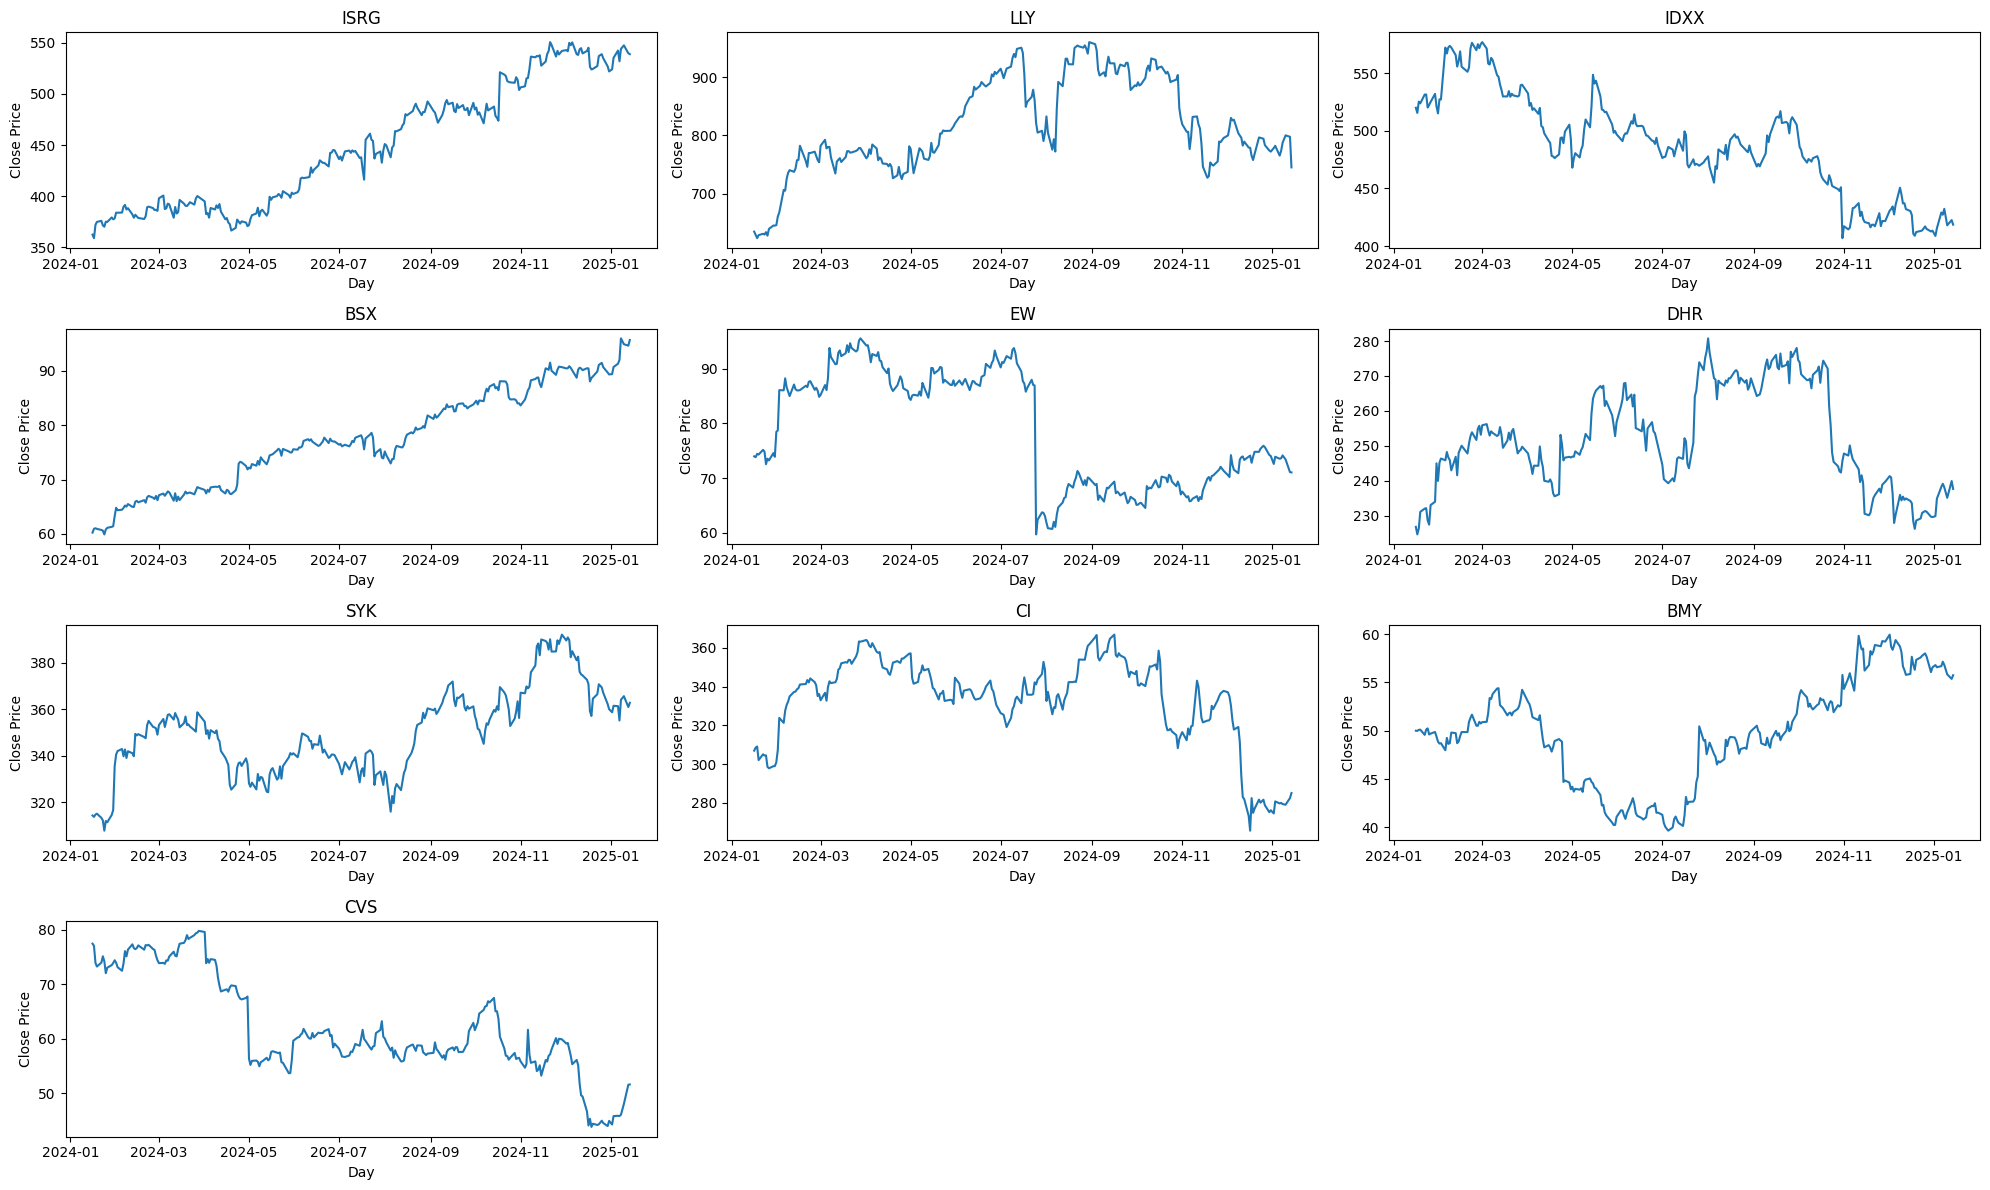

In [27]:
plt.figure(figsize=(20,12))
for i, company in enumerate(healthcare_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

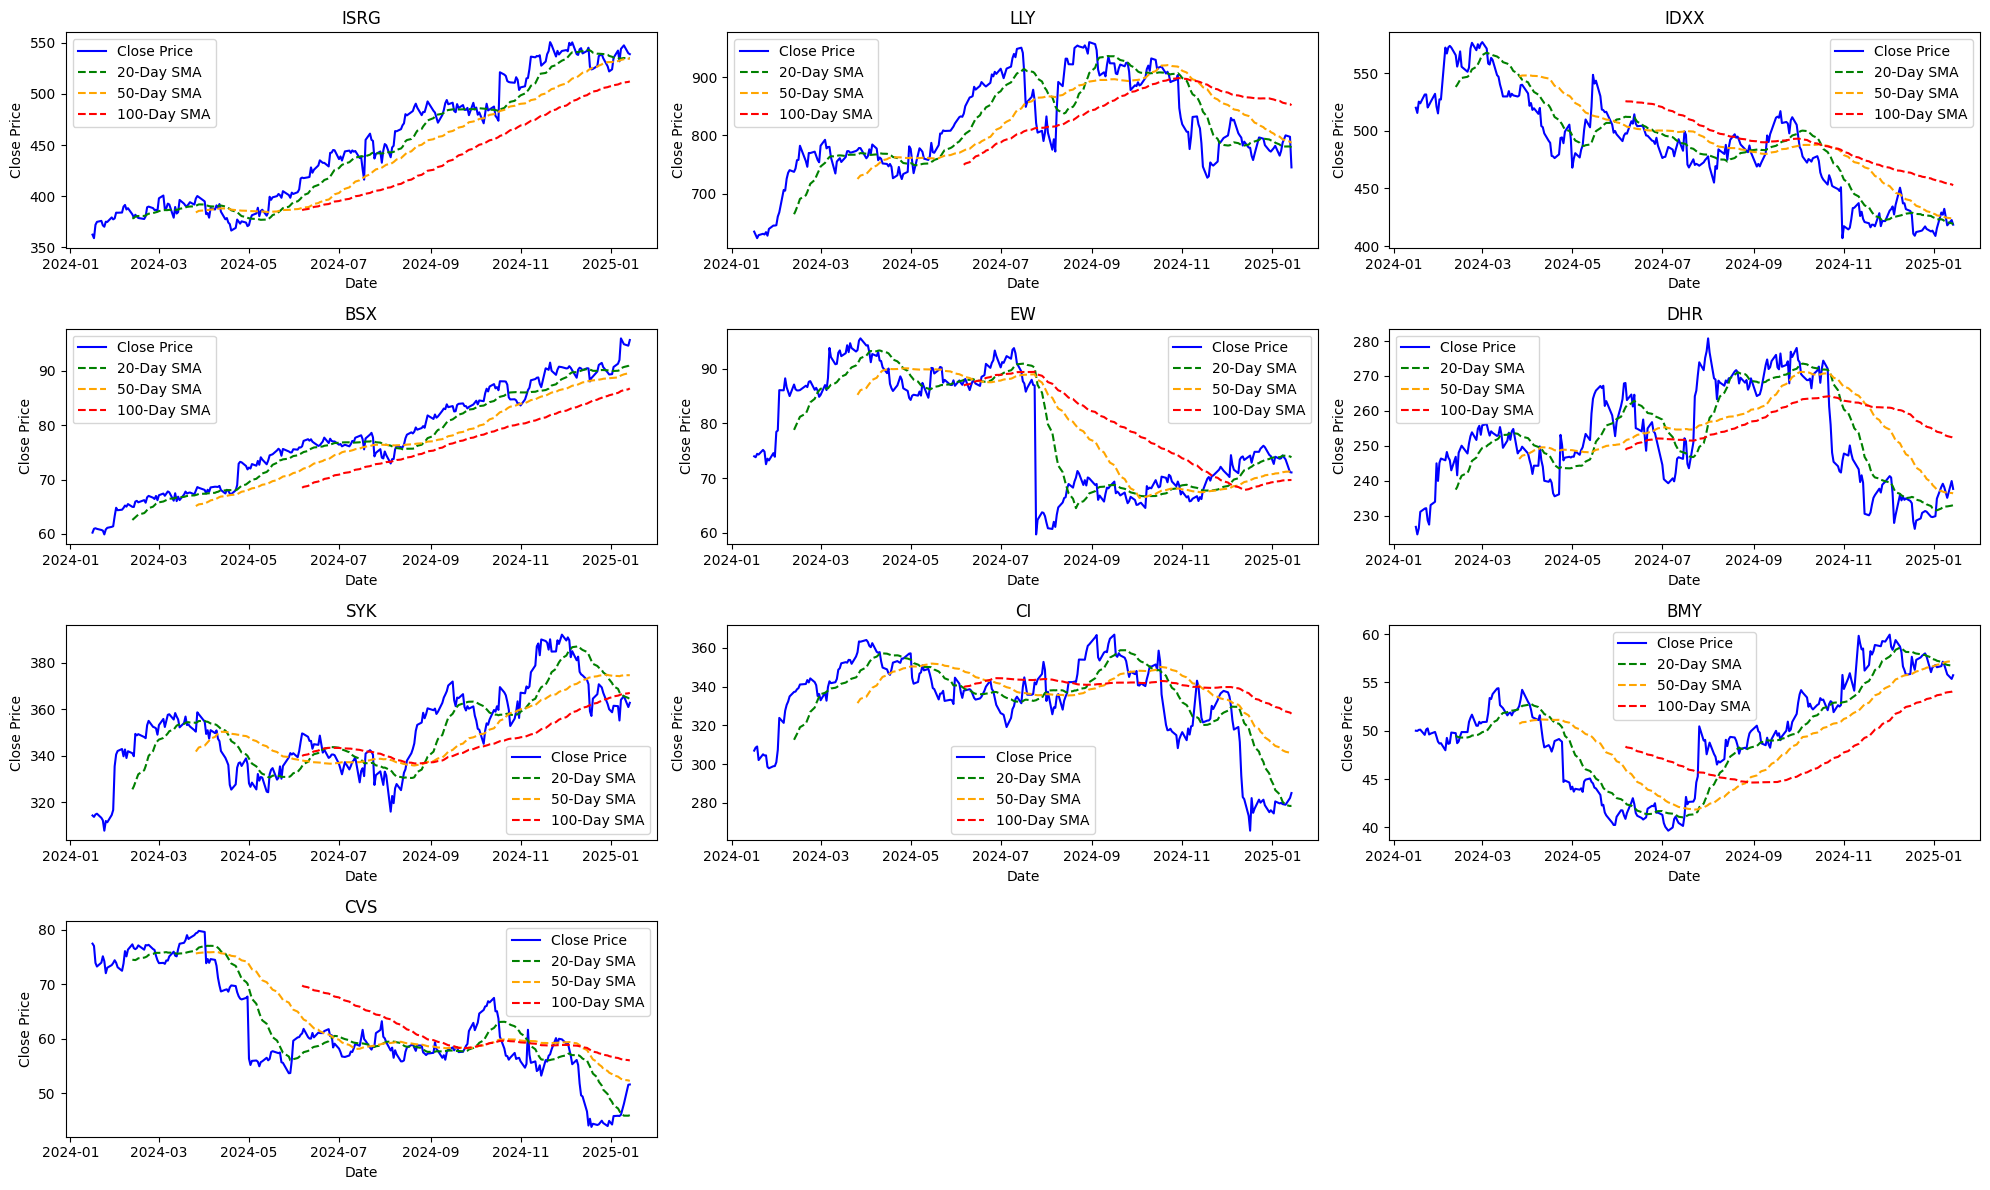

In [31]:
plt.figure(figsize=(20,12))
for i, company in enumerate(healthcare_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()

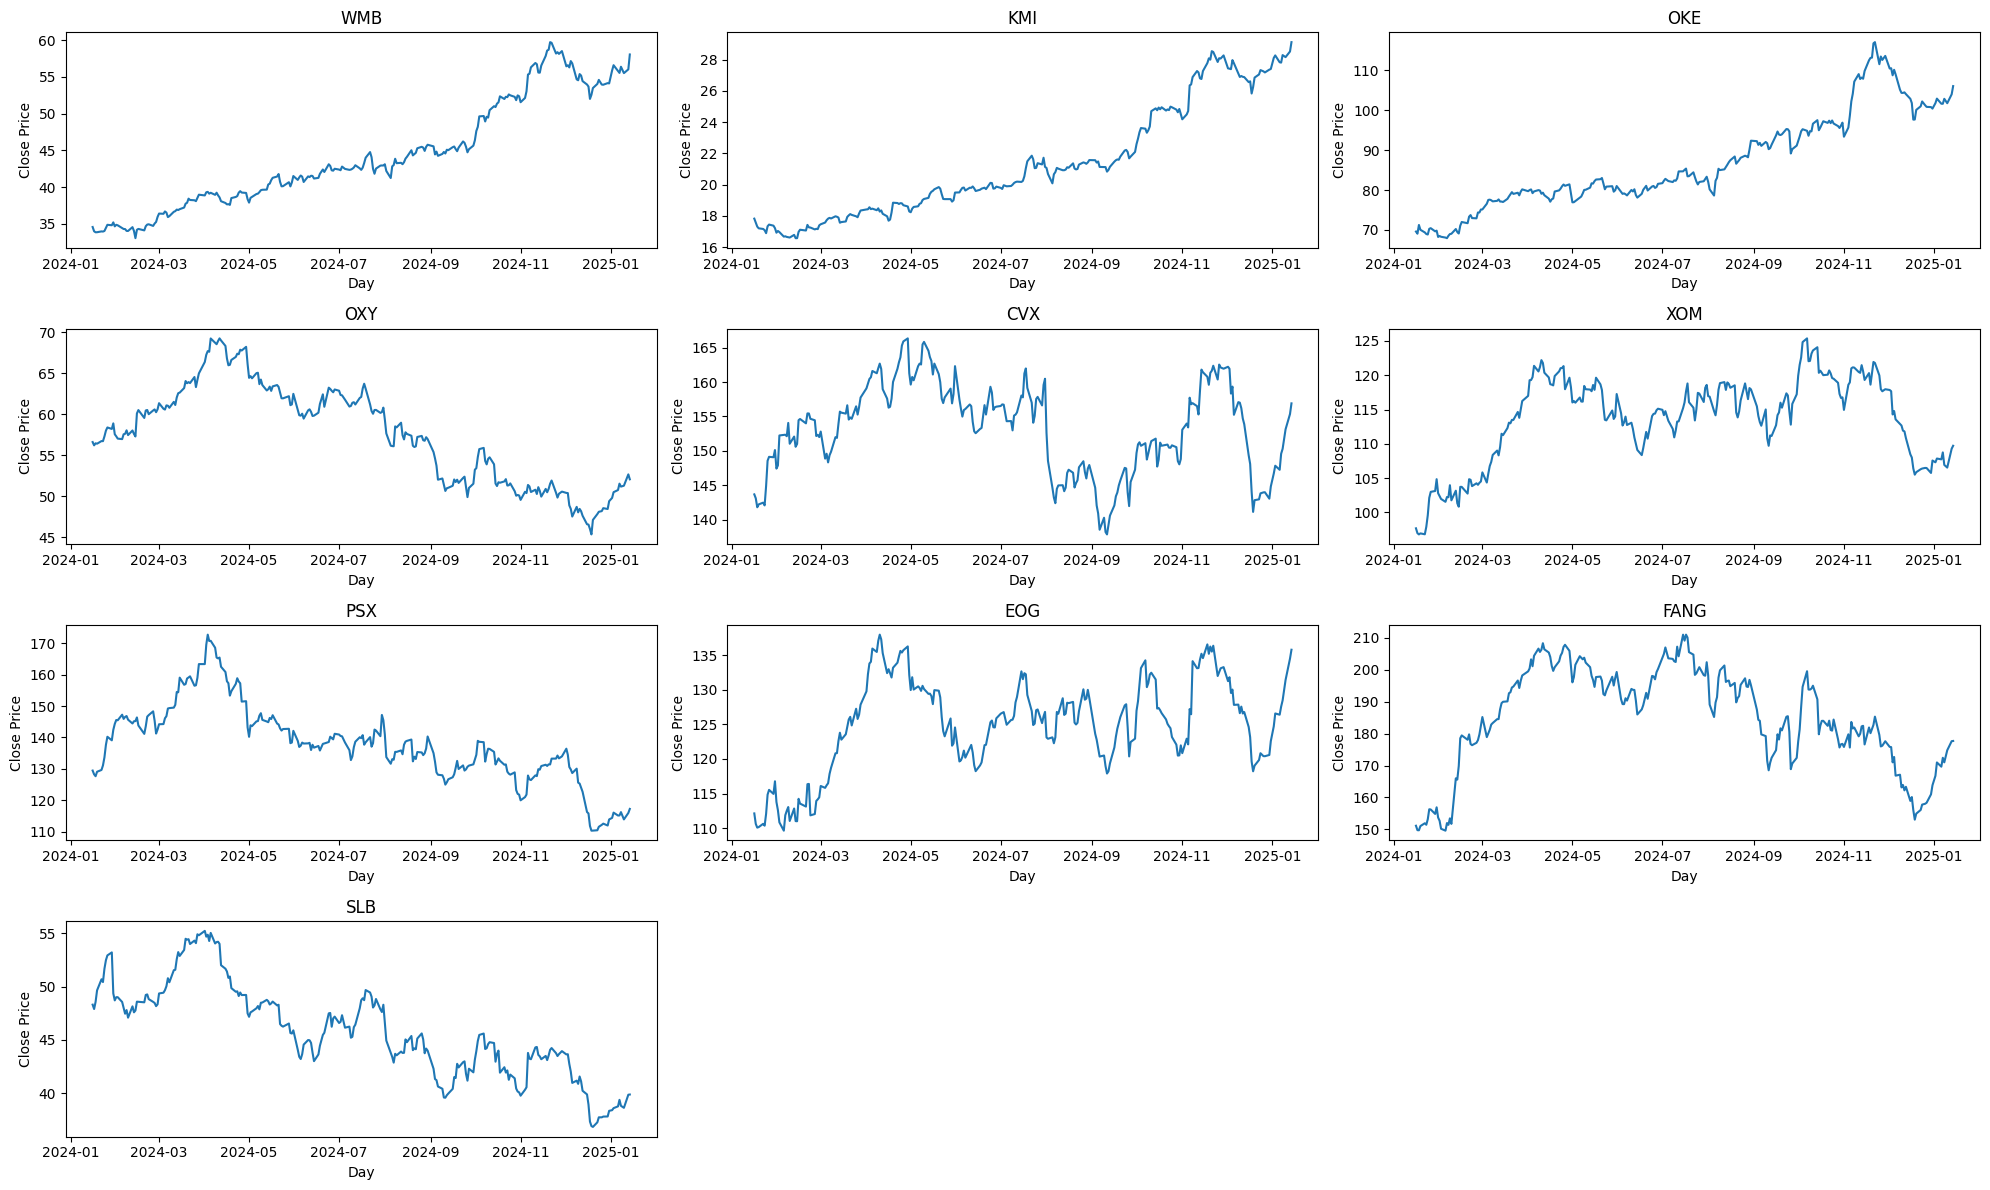

In [32]:
plt.figure(figsize=(20,12))
for i, company in enumerate(energy_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

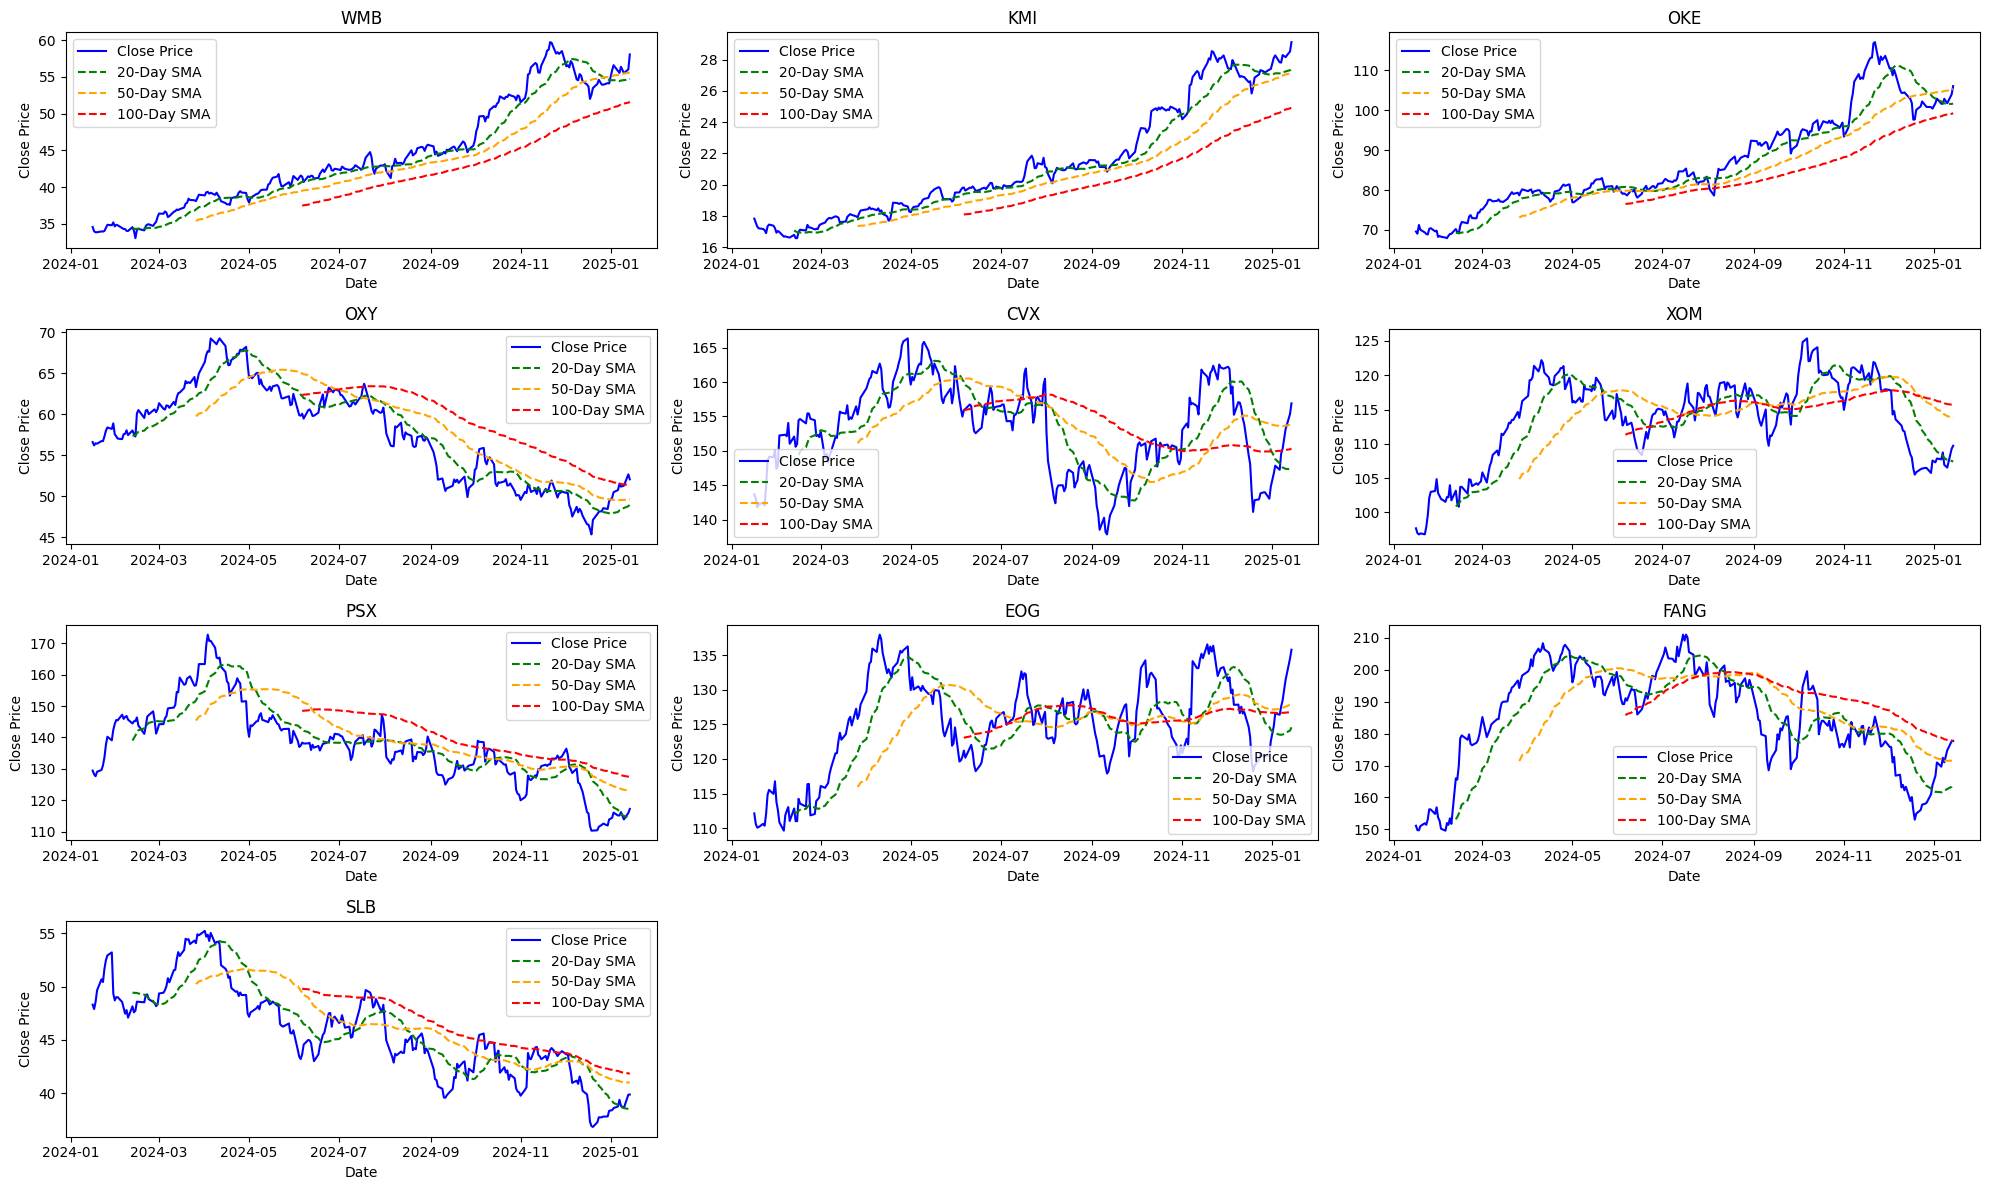

In [33]:
plt.figure(figsize=(20,12))
for i, company in enumerate(energy_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()


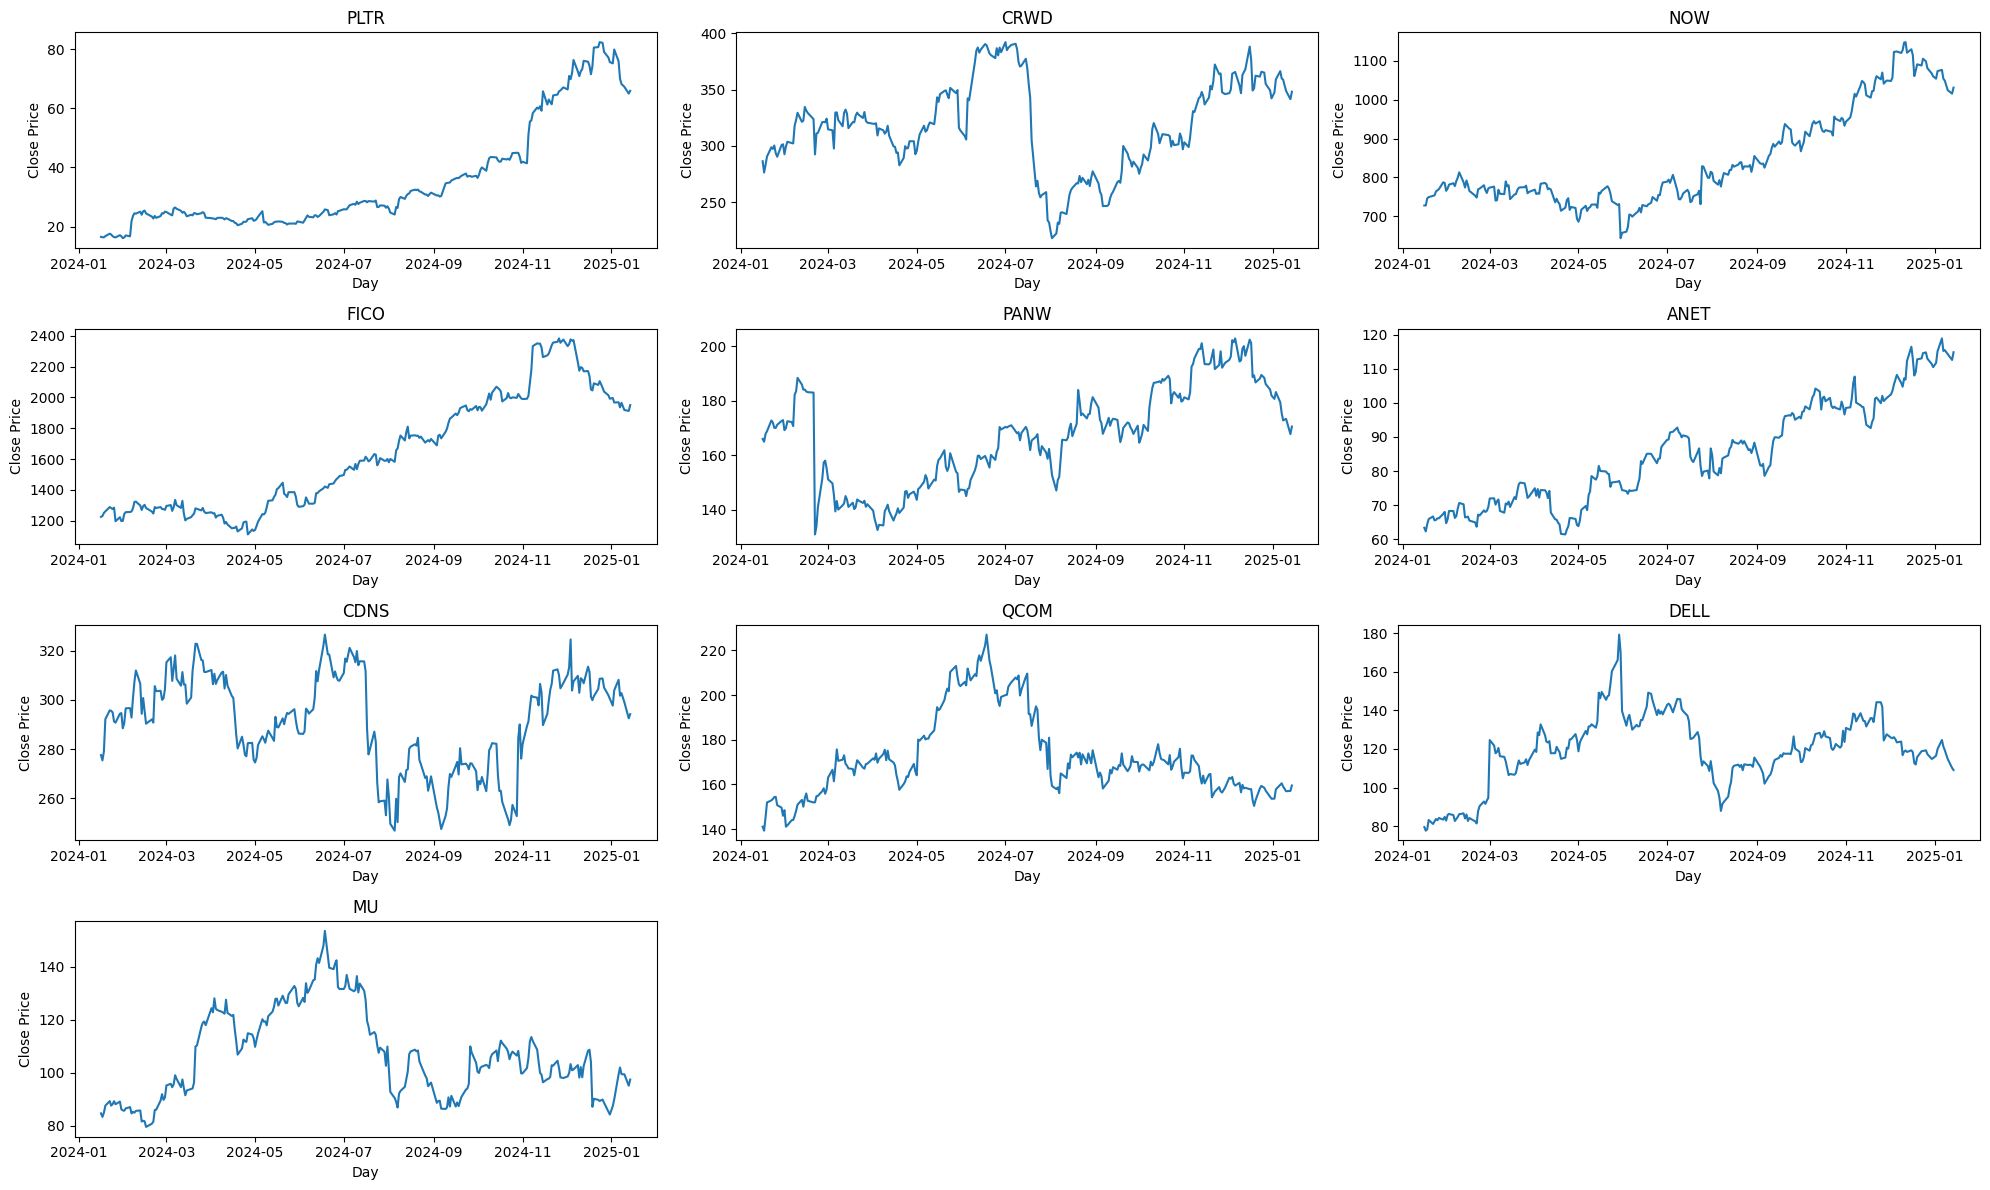

In [24]:
plt.figure(figsize=(20,12))
for i, company in enumerate(technology_stocks,1):
    plt.subplot(4, 3, i)
    df=close_stocks[company]
    plt.plot(close_stocks['Date'], close_stocks[company])
    plt.title(company)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
plt.tight_layout()
plt.show()  

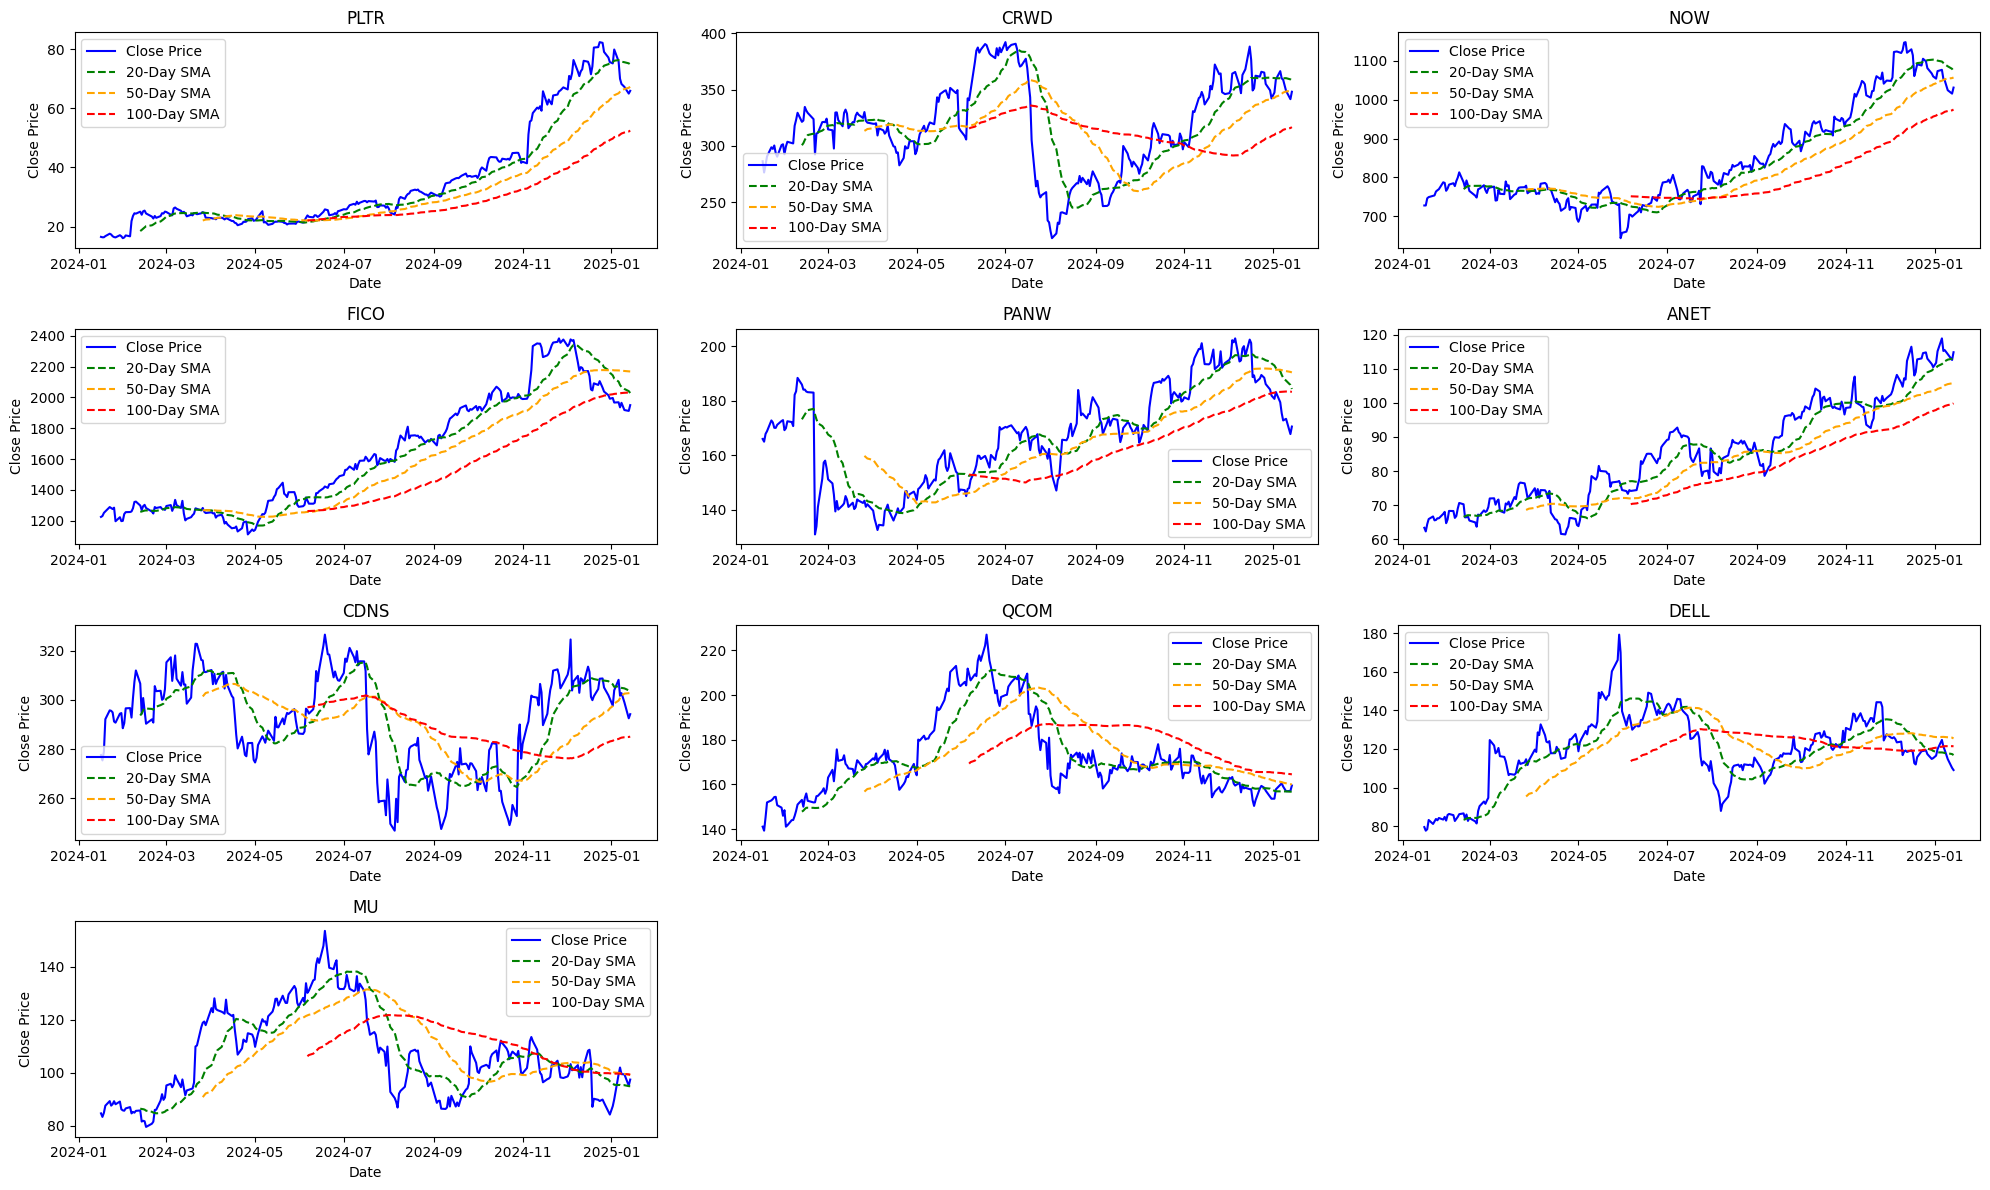

In [34]:
plt.figure(figsize=(20,12))
for i, company in enumerate(technology_stocks, 1):
    df = close_stocks[company]
    
    sma_20 = df.rolling(window=20).mean()
    sma_50 = df.rolling(window=50).mean()
    sma_100 = df.rolling(window=100).mean()
    
    plt.subplot(4, 3, i)
    plt.plot(close_stocks['Date'], df, label='Close Price', color='blue')
    plt.plot(close_stocks['Date'], sma_20, label='20-Day SMA', color='green', linestyle='--')
    plt.plot(close_stocks['Date'], sma_50, label='50-Day SMA', color='orange', linestyle='--')
    plt.plot(close_stocks['Date'], sma_100, label='100-Day SMA', color='red', linestyle='--')
    
    plt.title(company)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    
plt.tight_layout()
plt.show()

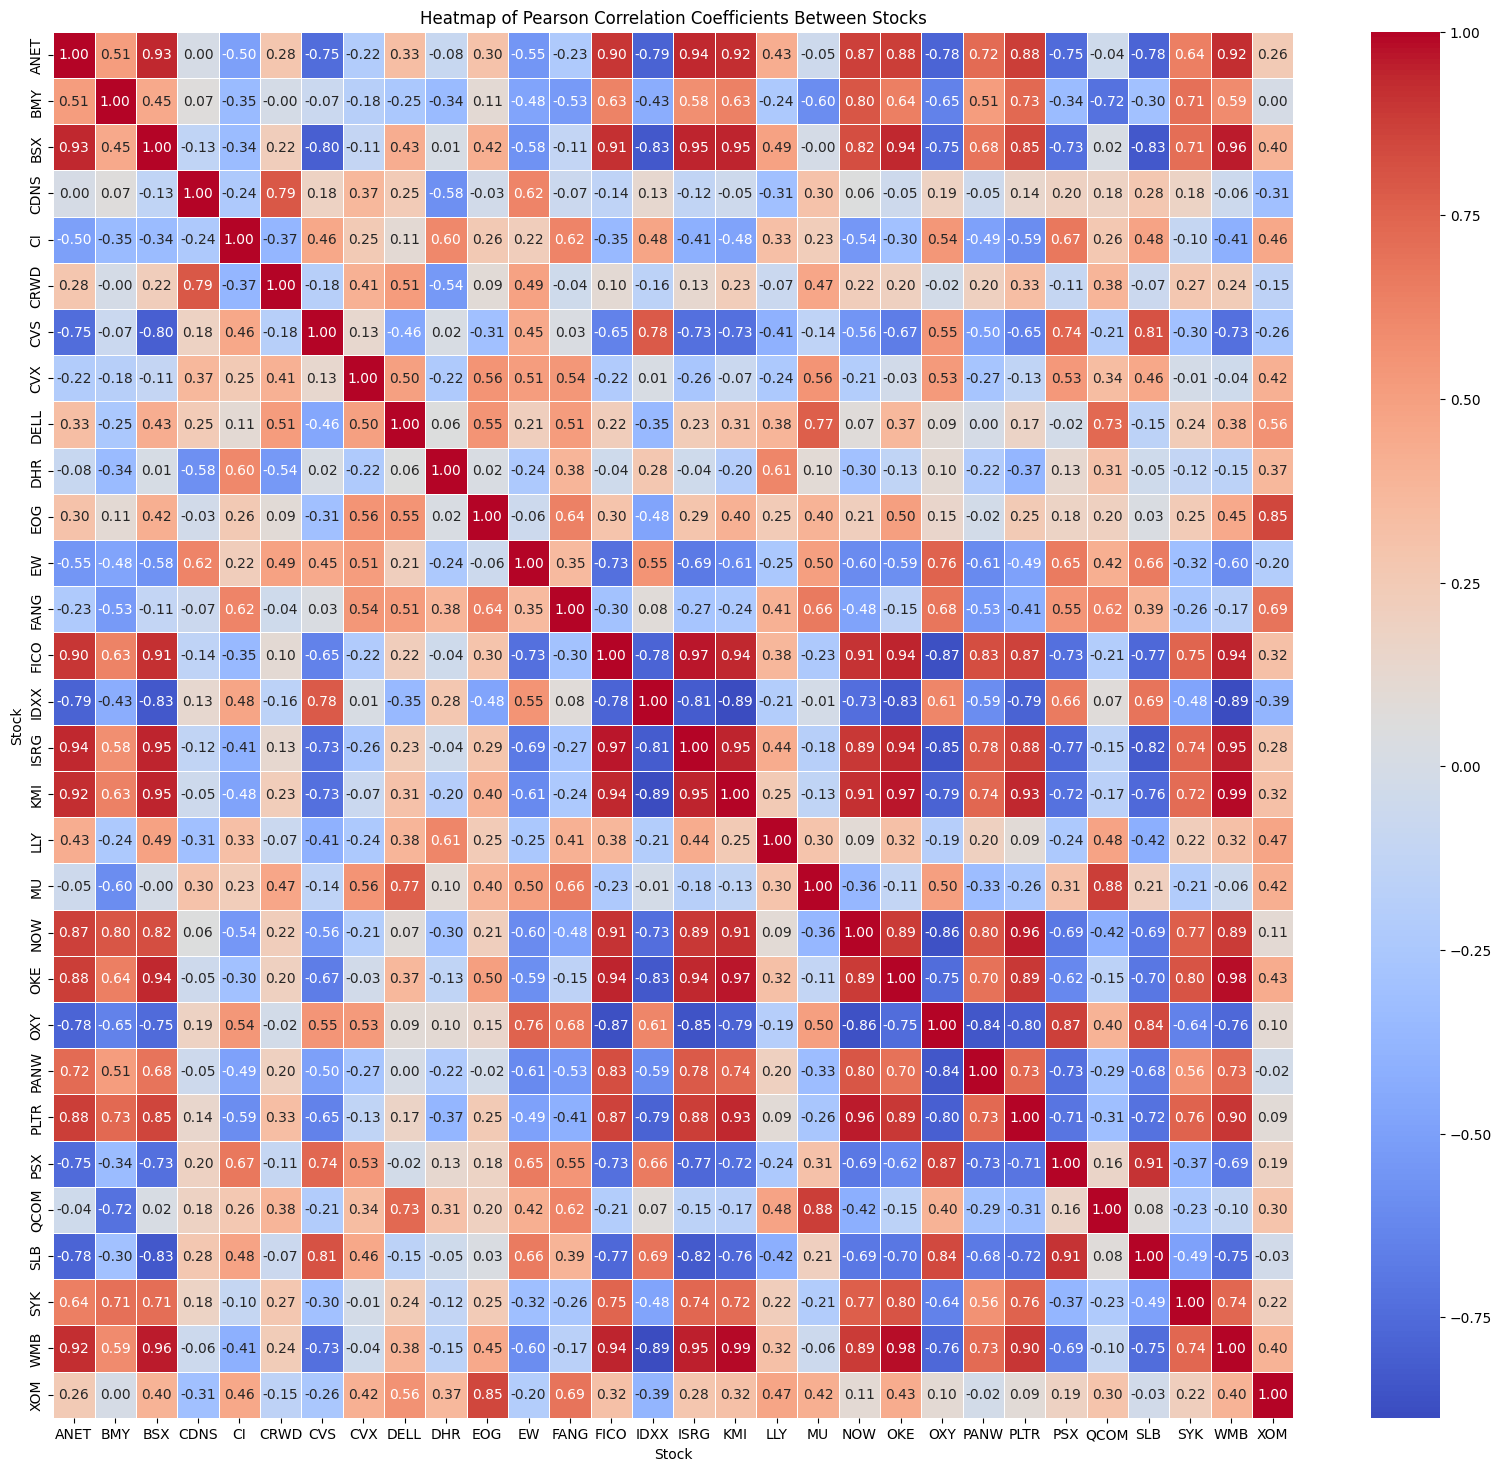

In [35]:
correlation_matrix = close_stocks.drop(columns = ['Date']).corr(method='pearson')
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Pearson Correlation Coefficients Between Stocks')
plt.xlabel('Stock')
plt.ylabel('Stock')
plt.show()